In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
%matplotlib inline

In [2]:
main_data = pd.read_csv('Task.csv', low_memory=False)

In [3]:
main_data.head(10)

,event_name,user_first_touch_timestamp,event_timestamp,ga_session_id,user_pseudo_id,operating_system_version,operating_system,mobile_os_hardware_model,mobile_model_name,mobile_marketing_name,mobile_brand_name,category
0,click_top_up,1.702993e+15,1703102700505249,1.703103e+09,b31dd8737646b020b227edcc06d01b06,Android 10,Android,MI 8 Lite,MI 8 Lite,NaN,Xiaomi,mobile
1,purchase,1.702768e+15,1703102798352348,1.703103e+09,fd016f3b57fdc356dd9195798534bab2,Android 13,Android,2303CRA44A,2303CRA44A,Redmi Note 12S,Xiaomi,mobile
2,click_top_up,1.703103e+15,1703102769880262,1.703103e+09,483B4764A744454982ABC07A03B486A4,iOS 16.7.2,iOS,"iPhone10,4",iPhone 8,NaN,Apple,mobile
3,click_w2w,1.691532e+15,1703103091622027,1.703103e+09,0ca20f40d3c849857971db773ae6e42c,Android 11,Android,6156H,6156D,20Y 2021 Global,TCL,mobile
4,gen_dynamic_bar_paywith10,1.703103e+15,1703102921757045,1.703103e+09,e0bf46b8d41449b198541ef497923c71,Android 13,Android,SM-A045F,SM-A045F,Galaxy A04,Samsung,mobile
5,click_bar_main,NaN,1703103738801618,NaN,07c00c9456562b67cd2e2ab7790e0dda,Android 9,Android,AMN-LX9,AMN-LX9,Y5 2019,Huawei,mobile
6,click_my_qr,1.700393e+15,1703102616054253,1.703101e+09,4c431f3eb95ad871e28d58641c9a0631,Android 10,Android,M2006C3MNG,M2006C3MNG,Redmi 9C,Xiaomi,mobile
7,gen_letstry_bravo_bar,1.703103e+15,1703103708757161,1.703103e+09,a1d7ba6c27775b7a6dcafc1158400c6a,Android 10,Android,M2006C3MG,M2006C3MG,Redmi 9C,Xiaomi,mobile
8,gen_cashback_banner,1.701183e+15,1703102771670646,1.703098e+09,5464fbad1f1b6f7fc8335139af6902d9,Android 8.0.0,Android,SM-A520F,SM-A520F,Galaxy A5 (2017),Samsung,mobile
9,purchase,1.697732e+15,1703103244861254,1.703103e+09,a57e23b353c804aac4718927686f0233,Android 10,Android,SM-J600F,SM-J600F,Galaxy J6,Samsung,mobile


## First of all I cleaned null values 
In 'user_first_touch_timestamp' column we had null values and it would effect our analyze for grouping on dates.
And also for mobile columns we had lots of null values and I replaced this null values with 'Unknown' label. 
Maybe in future analysis we would need it. 


In [4]:
main_data.isnull().sum()

event_name                          0
user_first_touch_timestamp         38
event_timestamp                     0
ga_session_id                     228
user_pseudo_id                      0
operating_system_version            0
operating_system                    0
mobile_os_hardware_model            0
mobile_model_name               31594
mobile_marketing_name         1887445
mobile_brand_name               31594
category                            0
dtype: int64

In [5]:
nan_rows = main_data[main_data['user_first_touch_timestamp'].isna()]


In [6]:
nan_rows.groupby('user_pseudo_id').agg(
total_events = ('event_name','count')
) #We have just 2 users who have null values. We can drop them.

,total_events
user_pseudo_id,
07c00c9456562b67cd2e2ab7790e0dda,29
b25e17b0f677f0ec2d6273eaaae54b65,9


In [7]:
main_data.shape

(5501971, 12)

In [8]:
main_data = main_data.dropna(subset=['user_first_touch_timestamp'])

In [9]:
main_data.isnull().sum()

event_name                          0
user_first_touch_timestamp          0
event_timestamp                     0
ga_session_id                     190
user_pseudo_id                      0
operating_system_version            0
operating_system                    0
mobile_os_hardware_model            0
mobile_model_name               31594
mobile_marketing_name         1887445
mobile_brand_name               31594
category                            0
dtype: int64

In [10]:
# We can fill other null values with Unknown name to see more clean data. 
main_data.fillna({'mobile_model_name':'Unknown', 'mobile_marketing_name':'Unknown','mobile_brand_name':'Unknown'}, inplace=True)

## I have to convert  'user_first_touch_timestamp' column's and 'event_timestamp' column's values to real dates

As we see dates coded with google analytics and I want to see it on real dates.
I will create columns as dates for full dates and hours of day and year_month.


In [11]:
main_data['event_timestamp'] = pd.to_datetime(main_data['event_timestamp'], unit='us')
main_data['user_first_touch_timestamp'] = pd.to_datetime(main_data['user_first_touch_timestamp'], unit='us')

In [12]:
main_data['date'] = main_data['event_timestamp'].dt.strftime('%Y-%m-%d')
main_data['year_month'] = main_data['event_timestamp'].dt.strftime('%Y-%m')
main_data['weekday'] = main_data['event_timestamp'].dt.day_name()
main_data['weekday_num'] = main_data['event_timestamp'].dt.weekday
main_data['time_of_day'] = main_data['event_timestamp'].dt.strftime('%H')

In [13]:
# I want to see Major OS versions to general analyze.
main_data['os_major_version'] = main_data['operating_system_version'].str.extract(r'(\D+\s*\d+)')

In [14]:
main_data.head(10)

,event_name,user_first_touch_timestamp,event_timestamp,ga_session_id,user_pseudo_id,operating_system_version,operating_system,mobile_os_hardware_model,mobile_model_name,mobile_marketing_name,mobile_brand_name,category,date,year_month,weekday,weekday_num,time_of_day,os_major_version
0,click_top_up,2023-12-19 13:29:53.763000064,2023-12-20 20:05:00.505249,1.703103e+09,b31dd8737646b020b227edcc06d01b06,Android 10,Android,MI 8 Lite,MI 8 Lite,Unknown,Xiaomi,mobile,2023-12-20,2023-12,Wednesday,2,20,Android 10
1,purchase,2023-12-16 23:02:16.432000000,2023-12-20 20:06:38.352348,1.703103e+09,fd016f3b57fdc356dd9195798534bab2,Android 13,Android,2303CRA44A,2303CRA44A,Redmi Note 12S,Xiaomi,mobile,2023-12-20,2023-12,Wednesday,2,20,Android 13
2,click_top_up,2023-12-20 20:04:19.014000128,2023-12-20 20:06:09.880262,1.703103e+09,483B4764A744454982ABC07A03B486A4,iOS 16.7.2,iOS,"iPhone10,4",iPhone 8,Unknown,Apple,mobile,2023-12-20,2023-12,Wednesday,2,20,iOS 16
3,click_w2w,2023-08-08 21:53:17.083000064,2023-12-20 20:11:31.622027,1.703103e+09,0ca20f40d3c849857971db773ae6e42c,Android 11,Android,6156H,6156D,20Y 2021 Global,TCL,mobile,2023-12-20,2023-12,Wednesday,2,20,Android 11
4,gen_dynamic_bar_paywith10,2023-12-20 20:06:45.215000064,2023-12-20 20:08:41.757045,1.703103e+09,e0bf46b8d41449b198541ef497923c71,Android 13,Android,SM-A045F,SM-A045F,Galaxy A04,Samsung,mobile,2023-12-20,2023-12,Wednesday,2,20,Android 13
6,click_my_qr,2023-11-19 11:21:49.849999872,2023-12-20 20:03:36.054253,1.703101e+09,4c431f3eb95ad871e28d58641c9a0631,Android 10,Android,M2006C3MNG,M2006C3MNG,Redmi 9C,Xiaomi,mobile,2023-12-20,2023-12,Wednesday,2,20,Android 10
7,gen_letstry_bravo_bar,2023-12-20 20:14:31.332000000,2023-12-20 20:21:48.757161,1.703103e+09,a1d7ba6c27775b7a6dcafc1158400c6a,Android 10,Android,M2006C3MG,M2006C3MG,Redmi 9C,Xiaomi,mobile,2023-12-20,2023-12,Wednesday,2,20,Android 10
8,gen_cashback_banner,2023-11-28 14:50:55.731000064,2023-12-20 20:06:11.670646,1.703098e+09,5464fbad1f1b6f7fc8335139af6902d9,Android 8.0.0,Android,SM-A520F,SM-A520F,Galaxy A5 (2017),Samsung,mobile,2023-12-20,2023-12,Wednesday,2,20,Android 8
9,purchase,2023-10-19 16:19:39.944999936,2023-12-20 20:14:04.861254,1.703103e+09,a57e23b353c804aac4718927686f0233,Android 10,Android,SM-J600F,SM-J600F,Galaxy J6,Samsung,mobile,2023-12-20,2023-12,Wednesday,2,20,Android 10
10,click_w2w,2023-10-19 16:19:39.944999936,2023-12-20 20:13:03.080263,1.703103e+09,a57e23b353c804aac4718927686f0233,Android 10,Android,SM-J600F,SM-J600F,Galaxy J6,Samsung,mobile,2023-12-20,2023-12,Wednesday,2,20,Android 10


## Let's get into some descriptive analysis
What is the most used feature in the application?

In [15]:
# First way. 
main_data.groupby('event_name')['user_pseudo_id'].count().sort_values(ascending=False).head(5)

event_name
click_transfer        735705
click_bar_history     641534
click_top_up          506010
click_bar_payments    505856
purchase              504572
Name: user_pseudo_id, dtype: int64

### Second Way
#### We just count all events on users but there can be spam due to one user can use multiple times on one session that's why we have to count it on per user, per session and per event   

In [16]:
Top_5 = (
    main_data
    .groupby(['user_pseudo_id', 'ga_session_id', 'event_name'])
    .agg(at_least_one_event=('event_name', 'nunique'))
    .reset_index()
    .groupby('event_name')['at_least_one_event'].sum()
    .sort_values(ascending=False)
    .head(5)
)

In [17]:
Top_5

event_name
click_transfer        289174
click_bar_payments    253023
purchase              248006
click_top_up          231905
click_w2c             219710
Name: at_least_one_event, dtype: int64

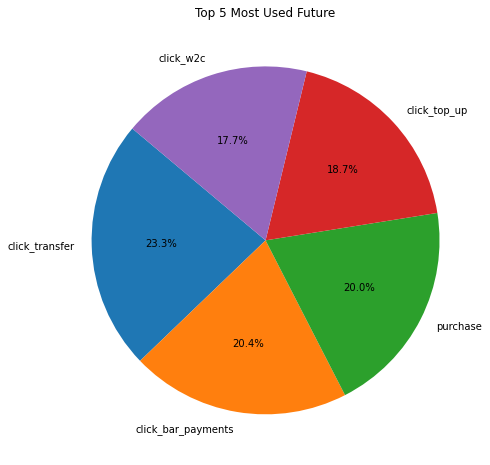

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(Top_5, labels=Top_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Used Futures')
plt.show()

## Which OPS System needs more care 
Assumption: If user participiated on antifraud event we might need to review the security system.

In [19]:
main_data = main_data[main_data['operating_system_version'] != 'Android 16.0.1'] #Android 16 is fake OS

In [20]:
antifraud_data = main_data[main_data['event_name'] == 'gen_letstry_antifraud']

In [21]:
total_users_per_version = main_data.groupby('os_major_version')['user_pseudo_id'].nunique()
proportions = antifraud_data['os_major_version'].value_counts()/ total_users_per_version 

In [22]:
top_operating_systems = proportions.sort_values(ascending=False).head(5)

In [23]:
top_operating_systems


Android 6     0.333333
Android 11    0.311620
Android 7     0.308540
Android 12    0.306889
Android 8     0.302128
dtype: float64

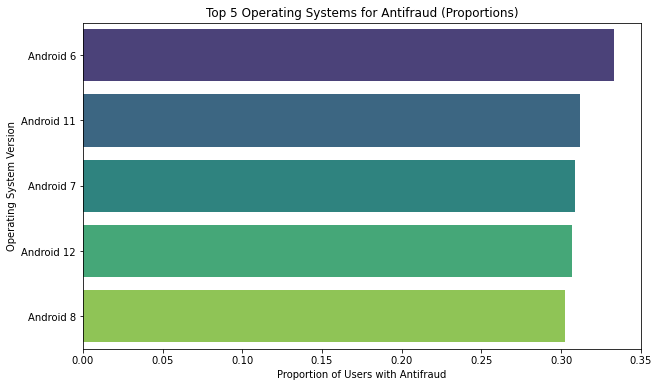

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_operating_systems.values, y=top_operating_systems.index, palette='viridis')
plt.title('Top 5 Operating Systems for Antifraud (Proportions)')
plt.xlabel('Proportion of Users with Antifraud')
plt.ylabel('Operating System Version')
plt.show()

## Which phones are experiencing problems with our app

Assumption: If user sends feedback its probably negative feedback.

In [25]:
feedback_event = 'send_benefit_feedback'
feedback_data = main_data[main_data['event_name'] == feedback_event]

In [26]:
total_users_per_version = main_data.groupby('os_major_version')['user_pseudo_id'].nunique()
feedback_counts = feedback_data['os_major_version'].value_counts()

ratios = feedback_counts / total_users_per_version.reindex(feedback_counts.index)

In [27]:
top_operating_systems_feedback = ratios.sort_values(ascending=False).head(5)

In [28]:
top_operating_systems_feedback

Android 6     0.066667
iOS 13        0.052632
Android 10    0.047214
Android 11    0.045047
Android 5     0.044643
dtype: float64

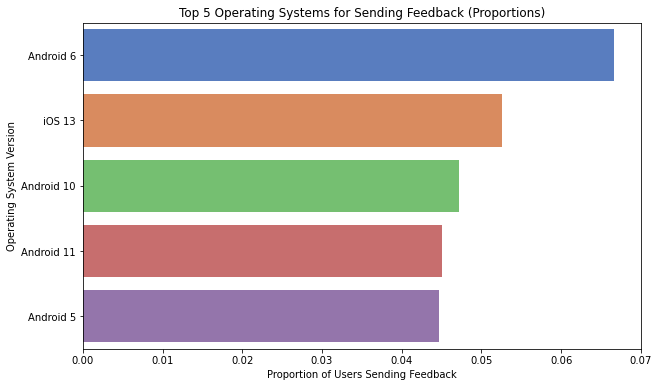

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_operating_systems_feedback.values, y=top_operating_systems_feedback.index, palette='muted')
plt.title('Top 5 Operating Systems for Sending Feedback (Proportions)')
plt.xlabel('Proportion of Users Sending Feedback')
plt.ylabel('Operating System Version')
plt.show()

## Retention
How much is the retention for users by time 



In [30]:
evolution_users = main_data.groupby('date').agg(unique_clients=('user_pseudo_id', 'nunique')).sort_index()

In [31]:
evolution_users.head()

,unique_clients
date,
2023-11-30,1629
2023-12-01,10309
2023-12-02,10054
2023-12-03,8582
2023-12-04,9663


In [32]:
Retention  = evolution_users.pct_change(periods=1) * 100

In [33]:
Retention = Retention.iloc[1:-1]

In [34]:
Retention

,unique_clients
date,
2023-12-01,532.842234
2023-12-02,-2.473567
2023-12-03,-14.640939
2023-12-04,12.596131
2023-12-05,6.416227
2023-12-06,7.721482
2023-12-07,6.942313
2023-12-08,-2.532500
2023-12-09,-4.408453


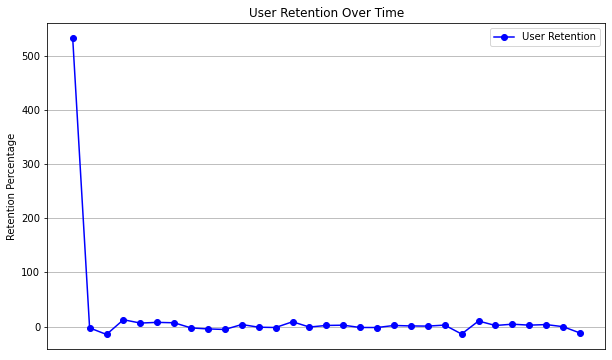

In [35]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(Retention['unique_clients'], marker='o', linestyle='-', color='b', label='User Retention')


plt.xticks([])


plt.title('User Retention Over Time')
plt.ylabel('Retention Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
Retention.mean()

unique_clients    17.744741
dtype: float64

##### We have avg 17 % retention and it's good for fintech app like **m10** but it has to be more than 20 % 

## What is the mort profitable day of week 
Assumption: We are gaining profit from purchases.

In [37]:
purchase = main_data[main_data['event_name']=='purchase']

In [38]:
Purchase = (
    purchase.groupby(['weekday_num', 'weekday', 'user_pseudo_id', 'event_name'])
    .agg(Total_purchase=('event_name', 'nunique'))
    .reset_index()
    .groupby(['weekday', 'weekday_num'])['Total_purchase'].sum()
    .sort_index(level='weekday_num', ascending=False)
)

In [39]:
Purchase = Purchase.reorder_levels(['weekday', 'weekday_num']).sort_index(level='weekday_num', ascending=True)
Purchase = Purchase.reset_index(level='weekday_num', drop=True)

In [40]:
Purchase

weekday
Monday       13211
Tuesday      13302
Wednesday    13571
Thursday     14090
Friday       16088
Saturday     15861
Sunday       14407
Name: Total_purchase, dtype: int64

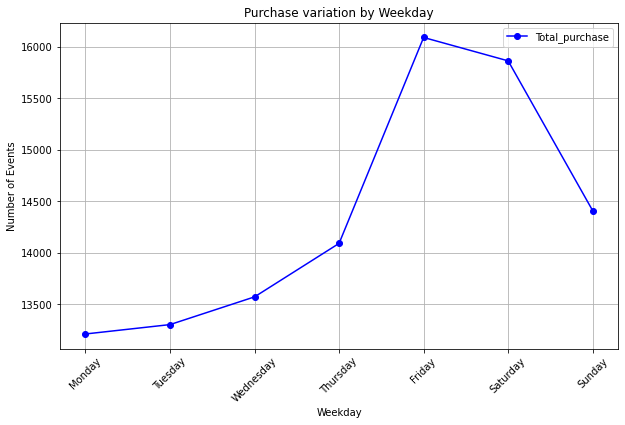

In [41]:
Purchase.plot(kind='line', marker='o', figsize=(10, 6), legend=True,color = 'blue')

plt.title('Purchase variation by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Stickiness

Total number of users per day in relation to total number of user per month.

In [42]:
date_stats = main_data.groupby(['date', 'weekday', 'weekday_num']).agg(unique_users=('user_pseudo_id', 'nunique')).reset_index()
year_month_stats = main_data.groupby('year_month').agg(unique_users_by_month=('user_pseudo_id', 'nunique')).reset_index()
date_stats['year_month'] = date_stats['date'].str[:7]

In [43]:
final_date_stats = date_stats.merge(year_month_stats)
final_date_stats['stickiness'] = final_date_stats['unique_users'] / final_date_stats['unique_users_by_month'] * 100

final_date_stats.drop([0, final_date_stats.shape[0] - 1], inplace=True)

In [44]:
final_date_stats['stickiness'].median(), final_date_stats['stickiness'].mean()

(18.020383917964107, 17.666499254714257)

In [45]:
Stickiness =final_date_stats.groupby([ 'weekday']).agg(
    avg_stick=('stickiness', 'mean'),
    med_stick=('stickiness', np.median)
)

In [46]:
Stickiness_sorted = Stickiness.sort_values(by='avg_stick', ascending=False)

In [47]:
Stickiness_sorted

,avg_stick,med_stick
weekday,,
Thursday,18.653473,18.477615
Friday,18.191396,18.048521
Saturday,18.114488,18.071969
Wednesday,17.814434,17.773401
Tuesday,17.289205,17.300538
Monday,17.092634,17.529544
Sunday,16.546614,16.449384


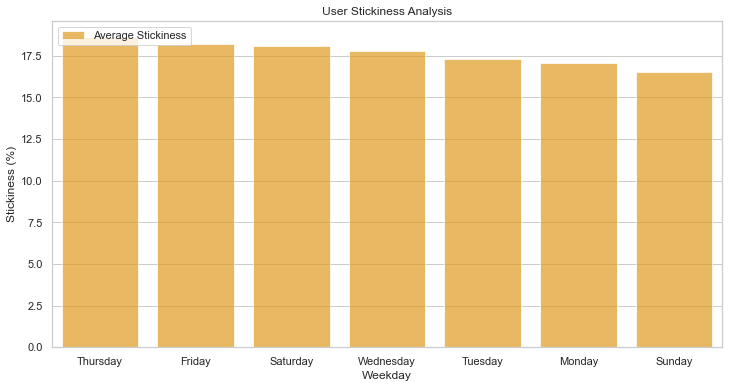

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=Stickiness_sorted.index, y='avg_stick', data=Stickiness_sorted, label='Average Stickiness', color='orange', alpha=0.7)
plt.title('User Stickiness Analysis')
plt.xlabel('Weekday')
plt.ylabel('Stickiness (%)')
plt.legend(loc='upper left')

plt.show()

This bar chart shows us Thursday is the most sticky day for us and we have most clients on Thursday, it means if we have some new campaigns or if we are just testing some new futures Thursday would be great for this role. And also with some in-app notifications we can raise stickiness on sunday.(For example 'Pay with m10 on your weekend and earn cashback'). Most of people spending more money weekends and I  assuming we earn profit from user's purschases)

## Which benefits were used the most

In [49]:
main_data['benefit_info'] = (
    main_data['event_name']
    .str.split("gen_dynamic_bar_paywith10_")
    .apply(lambda x: x[-1] if len(x) > 1 else 'na')
)

In [50]:
main_data['benefit_info'].value_counts()

na              5496650
bolmart            1327
grandmart          1237
open_scanner       1171
cafecity            805
megastore           495
bizim                24
buta                 12
aloe                 10
Name: benefit_info, dtype: int64

In [51]:
benefit_info_counts = main_data['benefit_info'].value_counts().iloc[1:]


In [52]:
benefit_info_counts

bolmart         1327
grandmart       1237
open_scanner    1171
cafecity         805
megastore        495
bizim             24
buta              12
aloe              10
Name: benefit_info, dtype: int64

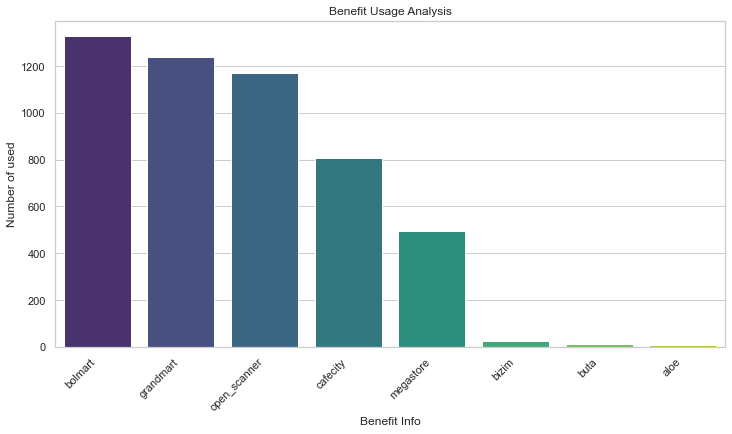

In [53]:

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=benefit_info_counts.index, y=benefit_info_counts.values, palette='viridis')

plt.title('Benefit Usage Analysis')
plt.xlabel('Benefit Info')
plt.ylabel('Number of used')
plt.xticks(rotation=45, ha='right')  
plt.show()


## What are customer preferences based on tablet or mobile?
Assumption. Each session is unique and short-lived (e.g. 30 mins, or 1 hour)

In [54]:
average_preferences = (
    main_data
    .groupby(['category', 'event_name'])
    .agg(avg_ssn=('ga_session_id', 'nunique'))
    .groupby(['category', 'event_name'])
    .mean()
    .reset_index()
    .sort_values(by=['category', 'avg_ssn'], ascending=[True, False])
)

In [55]:
average_preferences

,category,event_name,avg_ssn
12,mobile,click_transfer,269505.0
3,mobile,click_bar_payments,237736.0
36,mobile,purchase,232994.0
10,mobile,click_top_up,219112.0
13,mobile,click_w2c,208205.0
...,...,...,...
60,tablet,gen_dynamic_bar_paywith10_megastore,4.0
59,tablet,gen_dynamic_bar_paywith10_grandmart,3.0
58,tablet,gen_dynamic_bar_paywith10_cafecity,2.0
61,tablet,gen_dynamic_bar_paywith10_open_scanner,2.0


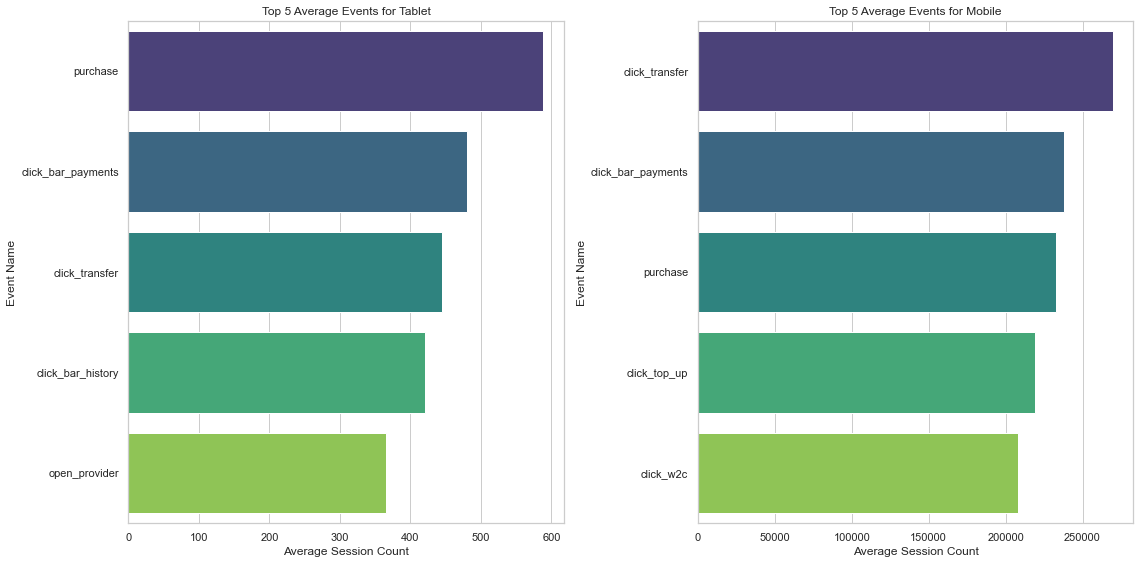

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='avg_ssn', y='event_name', data=average_preferences[average_preferences['category'] == 'tablet'].head(5), palette='viridis')
plt.title('Top 5 Average Events for Tablet')
plt.xlabel('Average Session Count')
plt.ylabel('Event Name')

plt.subplot(1, 2, 2)
sns.barplot(x='avg_ssn', y='event_name', data=average_preferences[average_preferences['category'] == 'mobile'].head(5), palette='viridis')
plt.title('Top 5 Average Events for Mobile')
plt.xlabel('Average Session Count')
plt.ylabel('Event Name')

plt.tight_layout()
plt.show()

 Customers prefer to use purchase functionality via tablet while they transfer money via mobile

## What is the average time spent in the app by customer
**Assumption**: event_timestamp is the time start of each session event and event timestamp is the subsequent timestamp of each event. Definition of time spent per session is different between first touch and last event timestamp.
    
We need to calculate total time spent in minutes for each session for each user. We could take total time spent by users across all sessions, but for this purpose we will just calculate average session time.

Average time spent in the app = average time of a session for each user

In [57]:
time_spent_by_session = main_data.groupby(['ga_session_id']).agg(
    session_start_time=('event_timestamp', 'min'),
    session_end_time=('event_timestamp', 'max')
)

In [58]:
time_spent_by_session['time_spent'] = (
    time_spent_by_session['session_end_time'] - time_spent_by_session['session_start_time']
)

In [59]:
time_spent_by_session[['time_spent']]

,time_spent
ga_session_id,
4.312000e+03,0 days 00:00:13.746993
1.681589e+09,0 days 00:06:55.452420
1.684921e+09,0 days 00:00:08.549011
1.687199e+09,0 days 00:05:02.866342
1.692526e+09,0 days 00:49:53.970618
...,...
1.704053e+09,0 days 00:00:12.624997
1.704053e+09,0 days 00:00:08.515004
1.704104e+09,0 days 00:01:42.876923


In [60]:
time_spent_by_session.sort_values(by='time_spent', ascending=False)

,session_start_time,session_end_time,time_spent
ga_session_id,,,
1.704023e+09,2023-12-31 11:50:56.724441,2024-01-30 12:12:12.992216,30 days 00:21:16.267775
1.701765e+09,2023-12-05 08:26:14.084334,2023-12-26 13:27:36.159255,21 days 05:01:22.074921
1.701583e+09,2023-12-03 05:58:40.447030,2023-12-21 06:18:25.812027,18 days 00:19:45.364997
1.700605e+09,2023-11-30 20:05:05.620973,2023-12-17 22:40:39.915017,17 days 02:35:34.294044
1.702315e+09,2023-12-11 17:20:34.758586,2023-12-26 19:56:48.126146,15 days 02:36:13.367560
...,...,...,...
1.702478e+09,2023-12-13 14:41:48.439625,2023-12-13 14:41:48.439625,0 days 00:00:00
1.702479e+09,2023-12-13 14:44:26.548828,2023-12-13 14:44:26.548828,0 days 00:00:00
1.703752e+09,2023-12-28 08:27:58.954170,2023-12-28 08:27:58.954170,0 days 00:00:00


In [61]:
Avg_time_spent = time_spent_by_session.agg(
    avg_time_spent=('time_spent', 'mean'),
    median_time_spent=('time_spent', np.median)
)

In [62]:
Avg_time_spent

,time_spent
avg_time_spent,0 days 00:09:49.073090578
median_time_spent,0 days 00:01:28.967759


In [63]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [64]:
from prettytable import PrettyTable
time_spent_by_session['time_spent_minutes'] = time_spent_by_session['time_spent'].dt.total_seconds() / 60.0
table = PrettyTable()
table.field_names = ["Label", "Time"]
table.add_row(["Average Time Spent", f"9.49 minutes"])
table.add_row(["Median Time Spent", f"1.28 minutes"])
print(table)

+--------------------+--------------+
|       Label        |     Time     |
+--------------------+--------------+
| Average Time Spent | 9.49 minutes |
| Median Time Spent  | 1.28 minutes |
+--------------------+--------------+


We can see from the table Avarage Time Spent is **9.49 minutes** for our app. In 2022 statistics Avarage Time Spent for the fintech apps is the 7.43 minutes to 6.06 minutes it means we can keep our clients on our app.
But for the outliers we can choose Median Time Spent (**1.28 minutes**) then it means we need more futures to keep our clients on our app.


## Most International Transfer and Cash relative Operations Systems

In [65]:
international_transfers = main_data[main_data['event_name'] == 'click_crossboarder_cart']

In [66]:
total_users_per_OS = international_transfers.groupby('operating_system')['user_pseudo_id'].nunique()

In [67]:
total_users_per_OS

operating_system
Android    6790
iOS        1226
Name: user_pseudo_id, dtype: int64

In [68]:
international_transfers['operating_system'].value_counts()

Android    15697
iOS         1761
Name: operating_system, dtype: int64

In [69]:
int_transfers_OS = total_users_per_OS/international_transfers['operating_system'].value_counts()

In [70]:
int_transfers_OS

operating_system
Android    0.432567
iOS        0.696195
dtype: float64

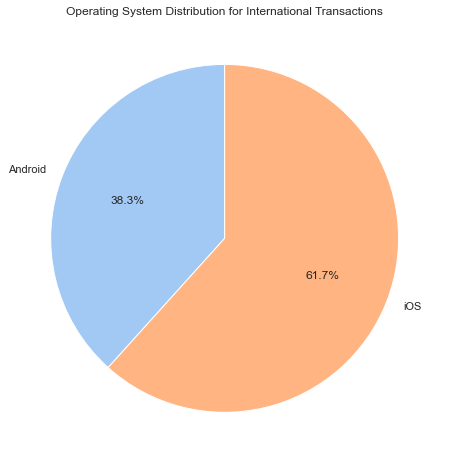

In [71]:
plt.figure(figsize=(8, 8))
plt.pie(int_transfers_OS, labels=int_transfers_OS.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Operating System Distribution for International Transactions')
plt.show()

In [72]:
cash_transaction_events = ['click_top_up_cash', 'click_withdraw']
cash_transaction_data = main_data[main_data['event_name'].isin(cash_transaction_events)]

In [73]:
cash_OS =cash_transaction_data.groupby('operating_system')['user_pseudo_id'].nunique()

In [74]:
cash_OS

operating_system
Android    13152
iOS         3331
Name: user_pseudo_id, dtype: int64

In [75]:
CASH_OS = cash_transaction_data['operating_system'].value_counts()

In [76]:
CASH_OS

Android    28249
iOS         6271
Name: operating_system, dtype: int64

In [77]:
cash_preferences = cash_OS / CASH_OS

In [78]:
cash_preferences

operating_system
Android    0.465574
iOS        0.531175
dtype: float64

/var/folders/b2/cth_5d555rz81434nv9cv3fw0000gn/T/ipykernel_55046/291042903.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(cash_preferences, labels=cash_preferences.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])


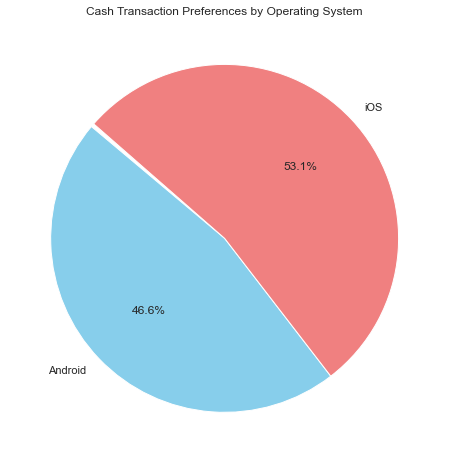

In [79]:
plt.figure(figsize=(8, 8))
plt.pie(cash_preferences, labels=cash_preferences.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.title('Cash Transaction Preferences by Operating System')
plt.show()

## Which time of day  we have most unique users

In [80]:
user_count_by_hour = main_data.groupby('time_of_day')['user_pseudo_id'].nunique().sort_index().reset_index()

In [81]:
user_count_by_hour.columns = ['Hour', 'Unique Users Count']

In [82]:
user_count_by_hour

,Hour,Unique Users Count
0,00,2611
1,01,2334
2,02,3407
3,03,6311
4,04,9414
5,05,13080
6,06,16317
7,07,18151
8,08,20377
9,09,21180


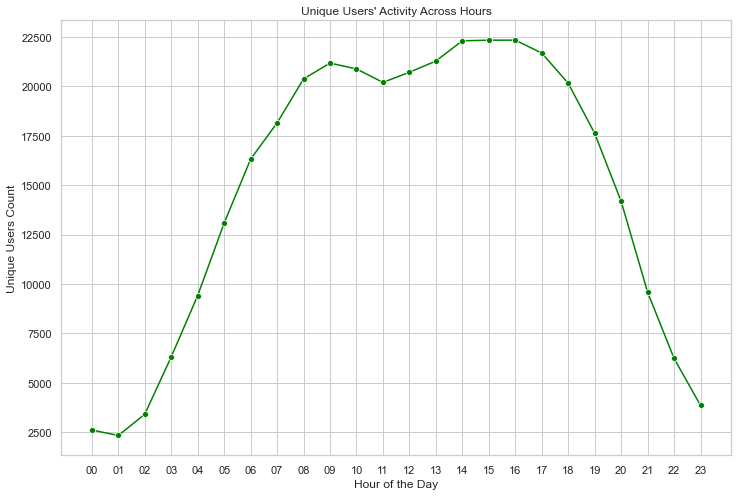

In [83]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.lineplot(x='Hour', y='Unique Users Count', data=user_count_by_hour, marker='o', color='green')
plt.title("Unique Users' Activity Across Hours")
plt.xlabel('Hour of the Day')
plt.ylabel('Unique Users Count')

plt.show()

## Heatmap

In [84]:
weekday_order = list(calendar.day_name)


main_data['time_of_day'] = pd.Categorical(main_data['time_of_day'], categories=[str(i) for i in range(24)], ordered=True)

In [85]:
user_hourly_weekday = main_data.groupby(['weekday', 'time_of_day'])['user_pseudo_id'].nunique().reset_index()

In [86]:
heatmap_data = user_hourly_weekday.pivot(index='time_of_day', columns='weekday', values='user_pseudo_id').fillna(0)
heatmap_data = heatmap_data[weekday_order].sort_values(by=heatmap_data.columns[-1], ascending=False)

In [87]:
heatmap_data

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time_of_day,,,,,,,
15,5401,5422,5597,5945,6782,6318,5864
14,5236,5320,5437,6220,6738,6531,5813
16,5234,5316,5361,5789,6866,6373,5676
13,4961,4837,5123,5498,6269,6222,5919
17,4985,4991,5101,5531,6650,6086,5310
12,4934,4627,4952,5038,6071,6137,5744
10,4672,4594,4738,4907,6027,6587,5857
11,4559,4513,4667,4786,5747,6096,5698
18,4520,4597,4604,4996,6014,5585,4963


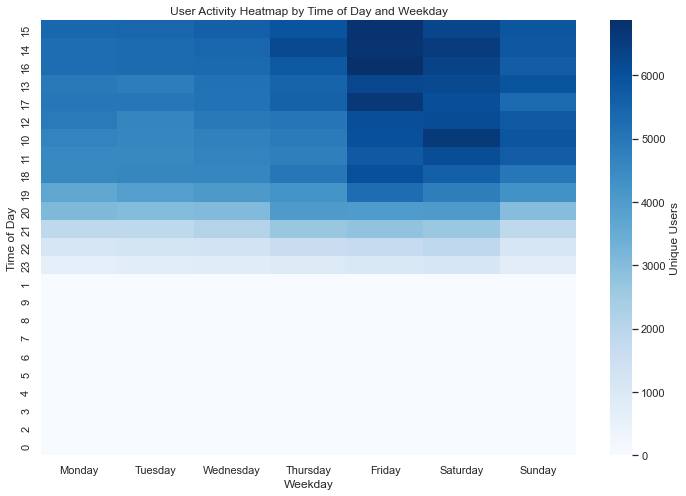

In [101]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap="Blues", cbar_kws={'label': 'Unique Users'})
plt.title('User Activity Heatmap by Time of Day and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Time of Day')
plt.show()

# Overall Conclusions 

* Click Transfer is the most used future and we have to make it more user-friendly for users to use it more efficiently. We have to make more user-friendly **transfer to card**.
* Most Customers use Android phones rather than IOS. We have to focus on Android for security updates front-end and back-end updates. For the Antifraud events, Android is also a leader. (I would like to insert Feedback Analysis for this but after researching m10 I found that it will not help me.) **Android 6** is leading for Antifraud and Feedback events.
* We have an Average 17 % retention rate and it's good for a fintech app like **m10** but it has to be more than 20 %.
* Thursday is the most sticky day for us and we have most clients on Thursday, it means if we have some new campaigns or if we are just testing some new futures Thursday would be great for this role. And also with some in-app notifications, we can raise stickiness on Sunday. (For example 'Pay with **m10** on your weekend and earn cashback'). Most people are spending more money on weekends and I'm assuming we are gonna earn more profit from user's purchases.
* Friday is also most Profitable day for us.
* We can see from the table Average Time Spent is **9.49 minutes** for our app. In 2022 statistics Average Time Spent for the fintech apps is 7.43 minutes to 6.06 minutes which means we can keep our clients on our app. But for the outliers, we can choose Median Time Spent (**1.28 minutes**) then it means we need more futures to keep our clients on our app.
* From 13:00 to 17:00 we have the most users and on Friday from 13:00 to 17:00 we have a great number of unique users we can use for short-time analysis.
*  Customers prefer to use purchase functionality via a tablet while they transfer money via mobile.
* We have lots of benefits but our most used top 2 benefits are: Bolmart and Grandmart(When I checked m10 now we don't have that benefit right now ) 
* On Overview our IOS-based users are more willing to spend **Cash** and make **International Transactions** than Android Users. It means Android users more willing to pay their bills and checks.
